[View in Colaboratory](https://colab.research.google.com/github/NurikS/SAT_Analysis/blob/master/SAT_Analysis.ipynb)

## In this project we will analyze the SAT scores of various schools, along with other variables such as demographics, AP results etc.

First we need to import all the necessary modules.

In [0]:
from google.colab import files
import pandas as pd
import numpy as np


Now let's import the needed files.

In [4]:
data = files.upload()

Saving 2012_SAT_Results.csv to 2012_SAT_Results (1).csv
Saving ap_results.csv to ap_results (1).csv
Saving attendance.csv to attendance (1).csv
Saving class_size.csv to class_size (1).csv
Saving demographics.csv to demographics (1).csv
Saving district_maps.csv to district_maps (1).csv
Saving graduation_outcomes.csv to graduation_outcomes (1).csv
Saving hs_directory.csv to hs_directory.csv
Saving math_test_results.csv to math_test_results (1).csv


Now, we need to read each file into the pandas dataframe and put all dataframes into the dictionary.

In [0]:
datafiles = ["2012_SAT_Results.csv", "ap_results.csv", "class_size.csv", "demographics.csv", "graduation_outcomes.csv", "math_test_results.csv", "hs_directory.csv"]
data = {}

for f in datafiles:
  d = pd.read_csv("{0}".format(f))
  data[f.replace(".csv", "")] = d

Once, we read all files in, we can use .head method to print first 5 lines of each frame.

In [7]:
for k,v in data.items():
    print("\n" + k + "\n")
    print(v.head())


math_test_results

      DBN Grade  Year      Category  Number Tested Mean Scale Score Level 1 #  \
0  01M015     3  2006  All Students             39              667         2   
1  01M015     3  2007  All Students             31              672         2   
2  01M015     3  2008  All Students             37              668         0   
3  01M015     3  2009  All Students             33              668         0   
4  01M015     3  2010  All Students             26              677         6   

  Level 1 % Level 2 # Level 2 % Level 3 # Level 3 % Level 4 # Level 4 %  \
0      5.1%        11     28.2%        20     51.3%         6     15.4%   
1      6.5%         3      9.7%        22       71%         4     12.9%   
2        0%         6     16.2%        29     78.4%         2      5.4%   
3        0%         4     12.1%        28     84.8%         1        3%   
4     23.1%        12     46.2%         6     23.1%         2      7.7%   

  Level 3+4 # Level 3+4 %  
0          26 

Now, to simplify the analysis, we need to unify the datasets, as we can see the most common column appears to be DBN, so we can try to use that as our common unifying column, however some datasets lack this column like ***class_size*** or ***hs_directory***, so we have to find a way to overcome that problem. Some online research can easily show that DBN is a code for each school, we can try to reorganize some other columns to construct a new one that we need.

In [0]:
data["class_size"]["DBN"] = data["class_size"].apply(lambda x: "{0:02d}{1}".format(x["CSD"], x["SCHOOL CODE"]), axis=1)
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

Now, in order to combine datasets, we need to condense them, because we would not be able to analyze SAT results, if rows on particular feature did not match. 

In [0]:
class_size = data["class_size"]                                      #store the class_size dataset into the variable
class_size = class_size[class_size["GRADE "] == "09-12"]             #only select values where GRADE is 09-12
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]      #only select values where PROGRAM TYPE is GEN ED
class_size = class_size.groupby("DBN").agg(np.mean)                  #group class_size by DBN and take the average of each column
class_size.reset_index(inplace=True)                                 #reset the index, so DBN wil be added back as the column
data["class_size"] = class_size                                      #replace the original dataset with modified one

Now, let's condense other datasets

In [0]:
#select only most recent data for particular school
demographics = data["demographics"]
demographics = demographics[demographics["schoolyear"] == 20112012]
data["demographics"] = demographics

#select only one grade from one year 
data["math_test_results"] = data["math_test_results"][data["math_test_results"]["Year"] == 2011]
data["math_test_results"] = data["math_test_results"][data["math_test_results"]["Grade"] == '8']

#finally, condense graduation_outcomes
data["graduation_outcomes"] = data["graduation_outcomes"][data["graduation_outcomes"]["Cohort"] == "2006"]
data["graduation_outcomes"] = data["graduation_outcomes"][data["graduation_outcomes"]["Demographic"] == "Total Cohort"]

Next, we are going to need to calculate some variables for later use, such as max SAT score.

In [13]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["2012_SAT_Results"][c] = data["2012_SAT_Results"][c].convert_objects(convert_numeric=True)

data['2012_SAT_Results']['sat_score'] = data['2012_SAT_Results'][cols[0]] + data['2012_SAT_Results'][cols[1]] + data['2012_SAT_Results'][cols[2]]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


It will also be nice to have coordinate locations of schools to map them later.

In [15]:
data["hs_directory"]['lat'] = data["hs_directory"]['Location 1'].apply(lambda x: x.split("\n")[-1].replace("(", "").replace(")", "").split(", ")[0])
data["hs_directory"]['lon'] = data["hs_directory"]['Location 1'].apply(lambda x: x.split("\n")[-1].replace("(", "").replace(")", "").split(", ")[1])

for c in ['lat', 'lon']:
    data["hs_directory"][c] = data["hs_directory"][c].convert_objects(convert_numeric=True)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


Now, let's print everything out to see what we have.

In [16]:
for k,v in data.items():
    print(k)
    print(v.head())

math_test_results
        DBN Grade  Year      Category  Number Tested Mean Scale Score  \
111  01M034     8  2011  All Students             48              646   
280  01M140     8  2011  All Students             61              665   
346  01M184     8  2011  All Students             49              727   
388  01M188     8  2011  All Students             49              658   
411  01M292     8  2011  All Students             49              650   

    Level 1 # Level 1 % Level 2 # Level 2 % Level 3 # Level 3 % Level 4 #  \
111        15     31.3%        22     45.8%        11     22.9%         0   
280         1      1.6%        43     70.5%        17     27.9%         0   
346         0        0%         0        0%         5     10.2%        44   
388        10     20.4%        26     53.1%        10     20.4%         3   
411        15     30.6%        25       51%         7     14.3%         2   

    Level 4 % Level 3+4 # Level 3+4 %  
111        0%          11       22.9%  


Now, we are finally ready to combine all the datasets using join, since some datasets don't have ***high school*** that ***2012_SAT_Results***, we will use outer join technique.

In [17]:
#loop through every item in the data dict
#print the number of not unique DBNs in the item
#Choose the join technique - inner or outer
#Join the item to dataframe full using the column DBN

flat_data_names = [k for k,v in data.items()]
flat_data = [data[k] for k in flat_data_names]
full = flat_data[0]
for i, f in enumerate(flat_data[1:]):
    name = flat_data_names[i+1]
    print(name)
    print(len(f["DBN"]) - len(f["DBN"].unique()))
    join_type = "inner"
    if name in ["2012_SAT_Results", "ap_results", "graduation_outcomes"]:
        join_type = "outer"
    if name not in ["math_test_results"]:
        full = full.merge(f, on="DBN", how=join_type)

full.shape

2012_SAT_Results
0
demographics
0
hs_directory
0
ap_results
1
class_size
0
graduation_outcomes
0


(466, 158)

We are almost ready to do our analysis, we still need to do one thing though. We may want to find some correalation between SAT and AP exam results. To do that we need to convert values in ***ap_results*** to numeric.

In [18]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    full[col] = full[col].convert_objects(convert_numeric=True)

full[cols] = full[cols].fillna(value=0)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


Plus, we need to calculate a ***school_dist*** column that indicates the school district of the school. This will enable us to match up school districts and plot out district-level statistics using the district maps we downloaded earlier.

In [0]:
full["school_dist"] = full["DBN"].apply(lambda x: x[:2])

Let's get rid of any missing values in full.

In [0]:
full = full.fillna(full.mean())

Now, we are ready to compute correlations.

In [21]:
full.corr()['sat_score']

Year                                             NaN
Number Tested                           8.127817e-02
SAT Critical Reading Avg. Score         9.868201e-01
SAT Math Avg. Score                     9.726430e-01
SAT Writing Avg. Score                  9.877708e-01
sat_score                               1.000000e+00
schoolyear                                       NaN
frl_percent                            -7.018217e-01
total_enrollment                        3.668201e-01
ell_num                                -1.535745e-01
ell_percent                            -3.981643e-01
sped_num                                3.486852e-02
sped_percent                           -4.413665e-01
asian_num                               4.748801e-01
asian_per                               5.686267e-01
black_num                               2.788331e-02
black_per                              -2.827907e-01
hispanic_num                            2.568811e-02
hispanic_per                           -3.9263

This information gives a few insights into the data. For instance, total enrollment correlates strongly with sat_score, which is weird, because you'd think smaller schools, which focused more on the student, would have higher scores.

Now, we can plot a graph that shows the correlation between those two variables.

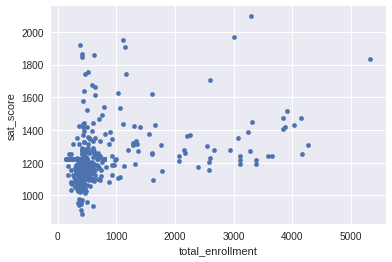

In [22]:
%matplotlib inline

full.plot.scatter(x='total_enrollment', y='sat_score')

We could now take a deeper look at any other pair of values to discover unexpected patterns and analyze them using different techniques.